**Задача 6 ** Загрузите набор данных о посетителях веб-сайта (например, набор данных Online Shoppers) и обучите модель классификации для предсказания, будет ли посетитель совершать покупку.

In [1]:
#Импорт библиотек
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

In [2]:
#Загрузка файла
from google.colab import files

uploaded = files.upload()

Saving online_shoppers_intention.csv to online_shoppers_intention.csv


In [3]:
#Чтение файла
data = pd.read_csv('online_shoppers_intention.csv')
data.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


# **АНАЛИЗ ДАННЫХ**

In [5]:
#Проверка на наличие нулевых значений и определение типов данных
data.info()
data.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

,0
Administrative,0
Administrative_Duration,0
Informational,0
Informational_Duration,0
ProductRelated,0
ProductRelated_Duration,0
BounceRates,0
ExitRates,0
PageValues,0
SpecialDay,0


In [7]:
data.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


,proportion
Revenue,
False,0.845255
True,0.154745


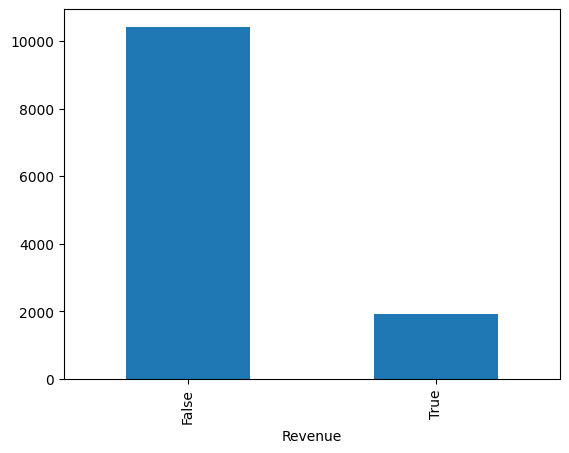

In [16]:
#Проверка баланса классов целевой переменной
data['Revenue'].value_counts().plot(kind='bar')
data['Revenue'].value_counts(normalize=True)

**Вывод:** Наблюдаем дисбаланс классов! нужно будет учесть при разделение на train и test



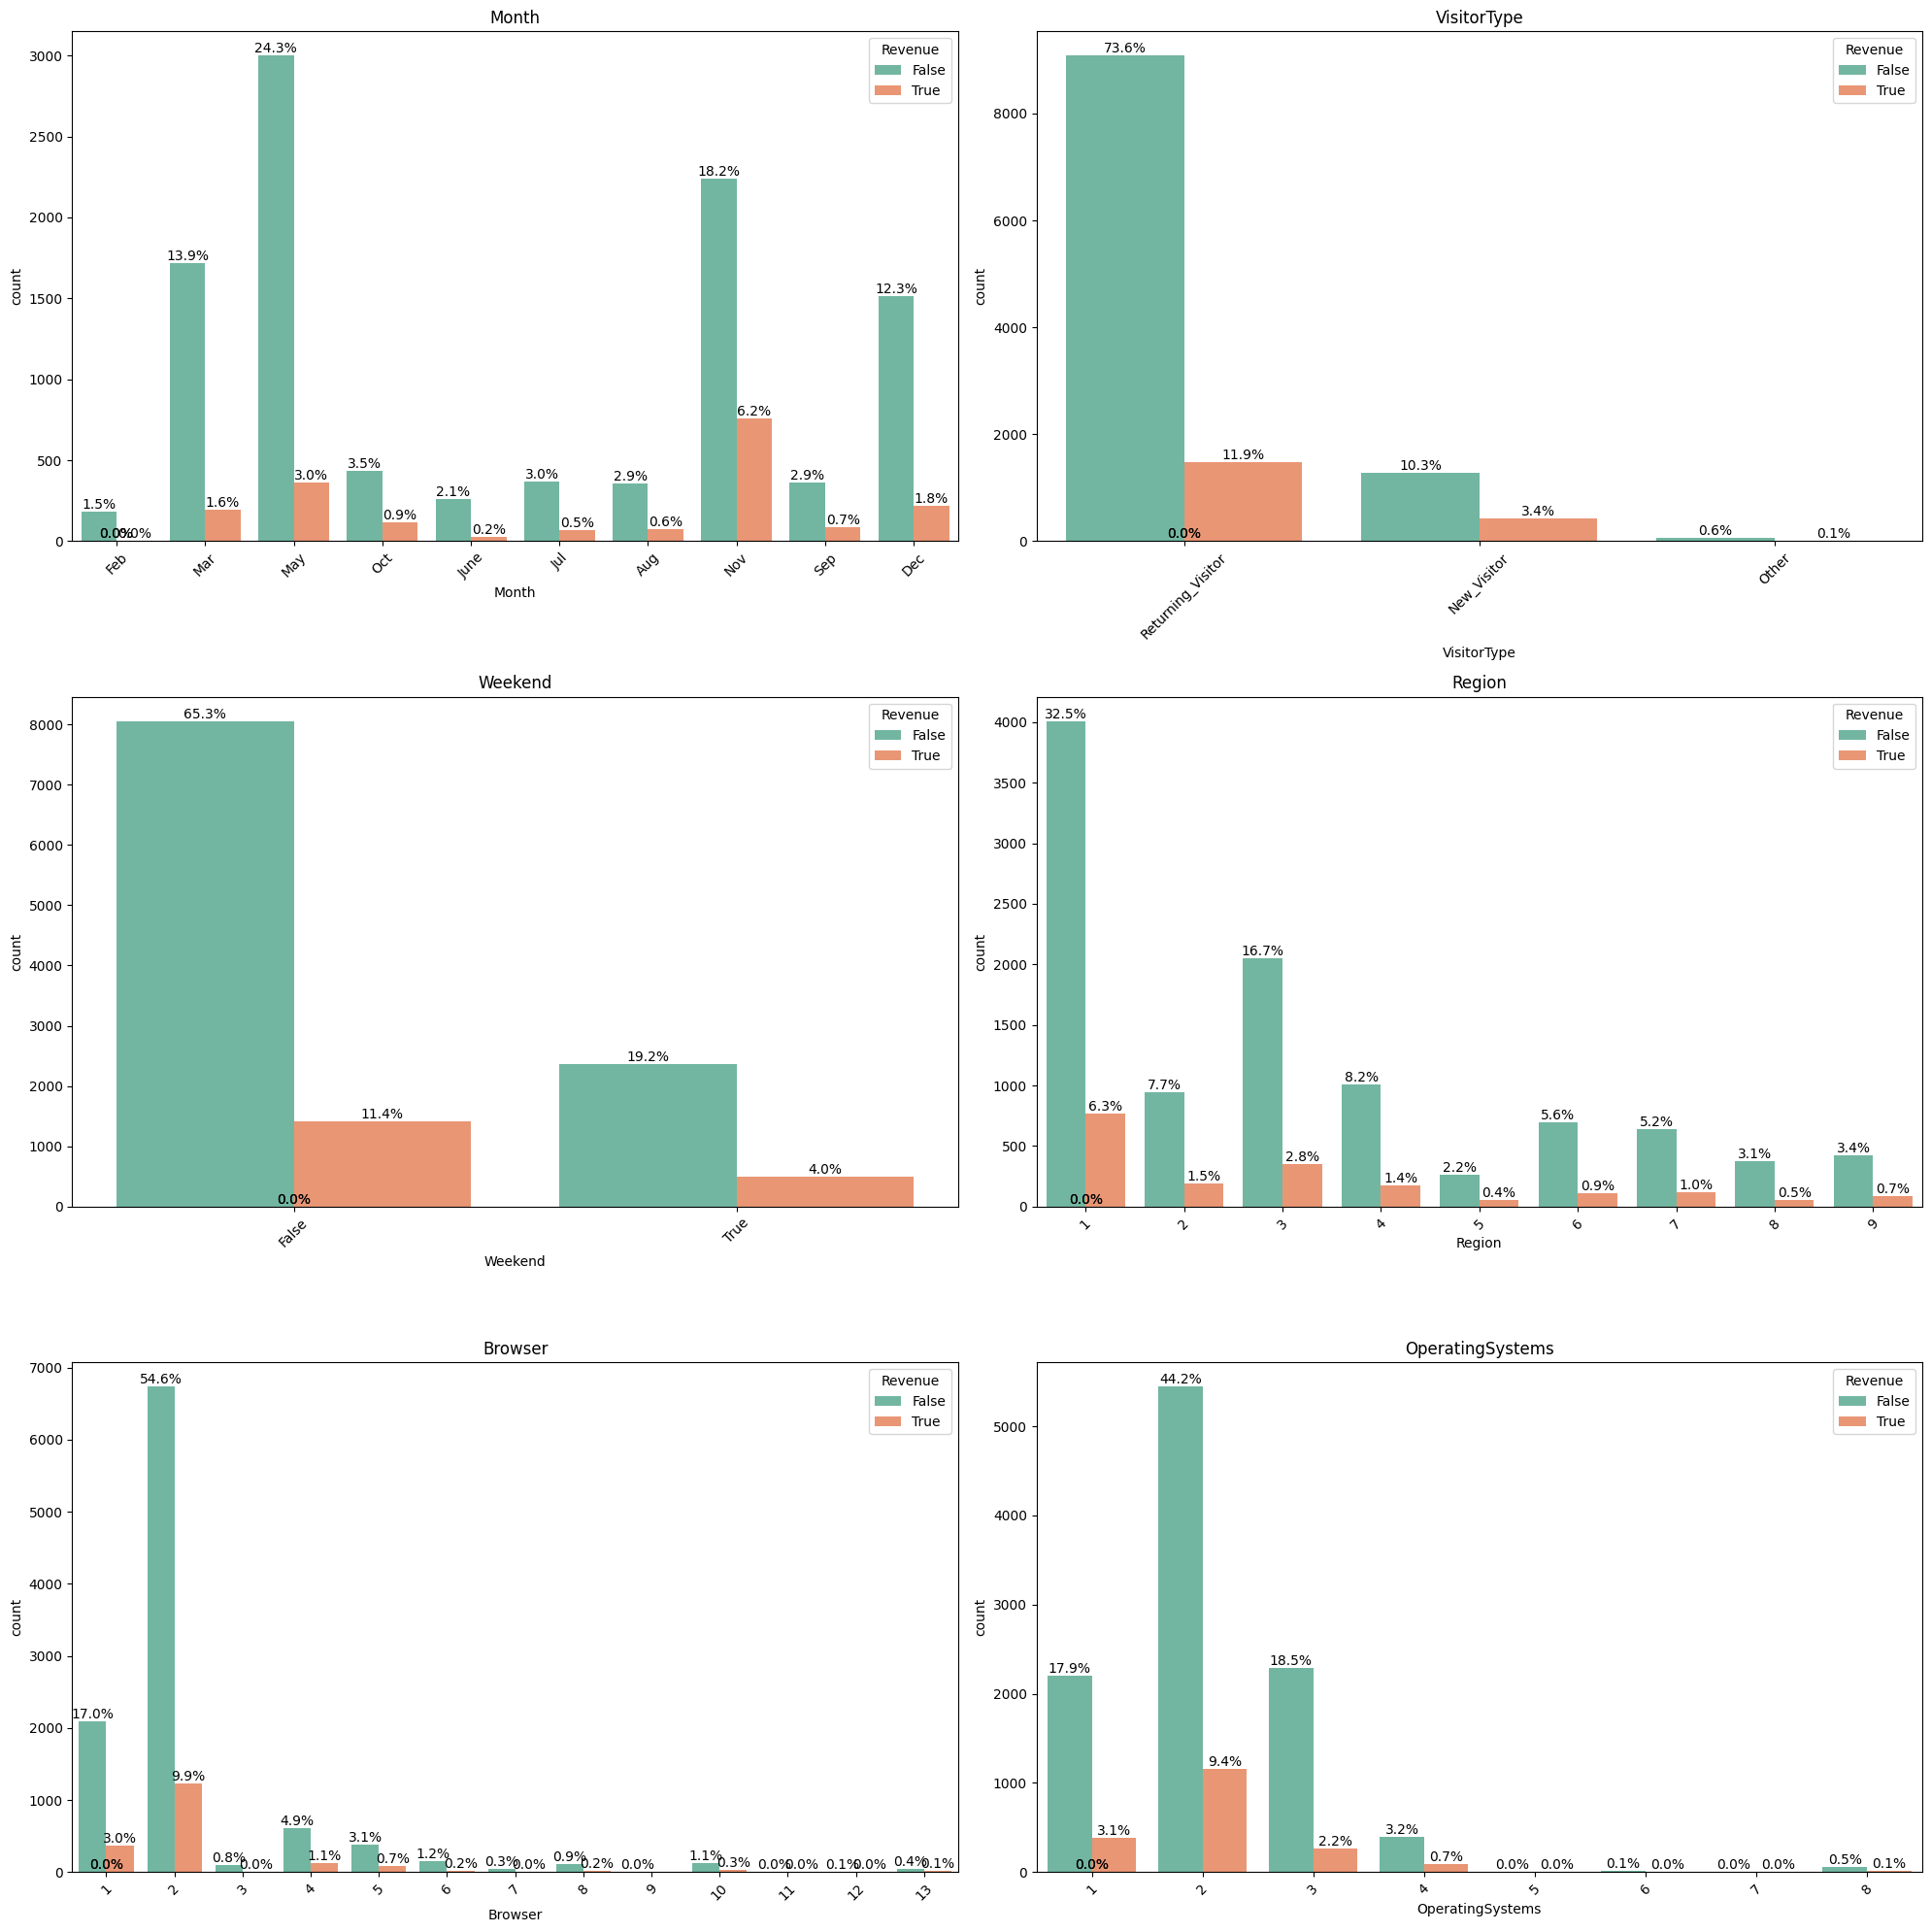

In [22]:
import matplotlib.pyplot as plt

# Анализ категориальных признаков
categorical_features = ['Month', 'VisitorType', 'Weekend', 'Region', 'Browser', 'OperatingSystems']
plt.figure(figsize=(20, 20))

for i, feature in enumerate(categorical_features, 1):
    plt.subplot(3, 2, i)
    ax = sns.countplot(x=feature, hue='Revenue', data=data, palette='Set2')
    total = len(data)
    for p in ax.patches:
        height = p.get_height()
        percentage = height / total * 100
        ax.annotate(f'{percentage:.1f}%',
                    (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='bottom', fontsize=10)

    plt.title(f'{feature}')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

**Вывод:** Исходя из данных, в ноябре люди активно совершают покупки на сайте, в то время как в феврале наблюдается снижение транзакций, хотя именно в этот месяц наибольшее количество пользователей. Посещаемость выше в будние дни, хотя процент продаж не сильно выше чем в выходные. Наибольшее количество транзакций в 1 и 3 Регионе. Непрезентабельны данные по VisitorType.

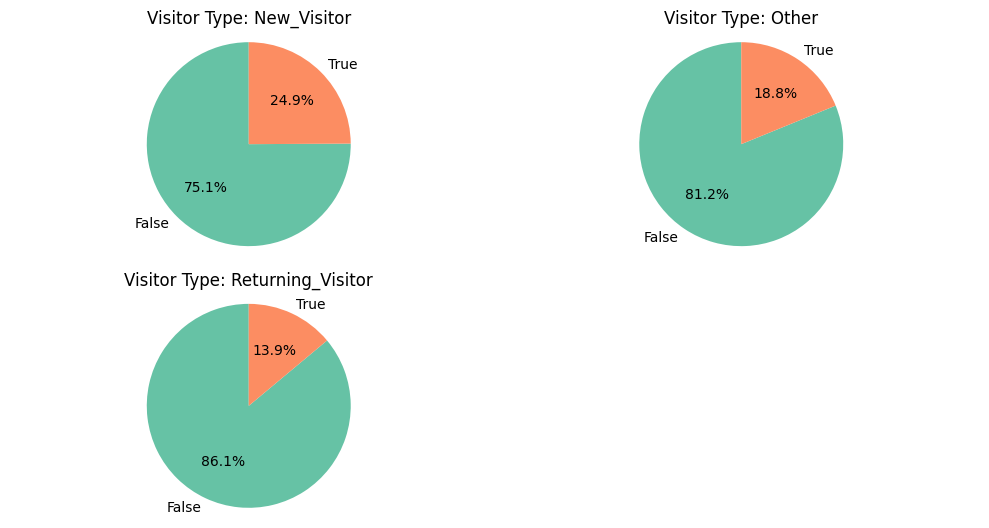

In [23]:
#Построение круговой диаграммы для признака 'VisitorType'
plt.figure(figsize=(10, 8))
revenue_counts = data.groupby(['VisitorType', 'Revenue']).size().unstack(fill_value=0)
for i, visitor_type in enumerate(revenue_counts.index):
    plt.subplot(3, 2, i + 1)
    plt.pie(revenue_counts.loc[visitor_type],
            labels=revenue_counts.columns,
            autopct='%1.1f%%',
            startangle=90,
            colors=sns.color_palette('Set2', n_colors=len(revenue_counts.columns)))

    plt.title(f'Visitor Type: {visitor_type}')
    plt.axis('equal')

plt.tight_layout()
plt.show()

**Вывод:** Новые посетители чаще делают покупки.

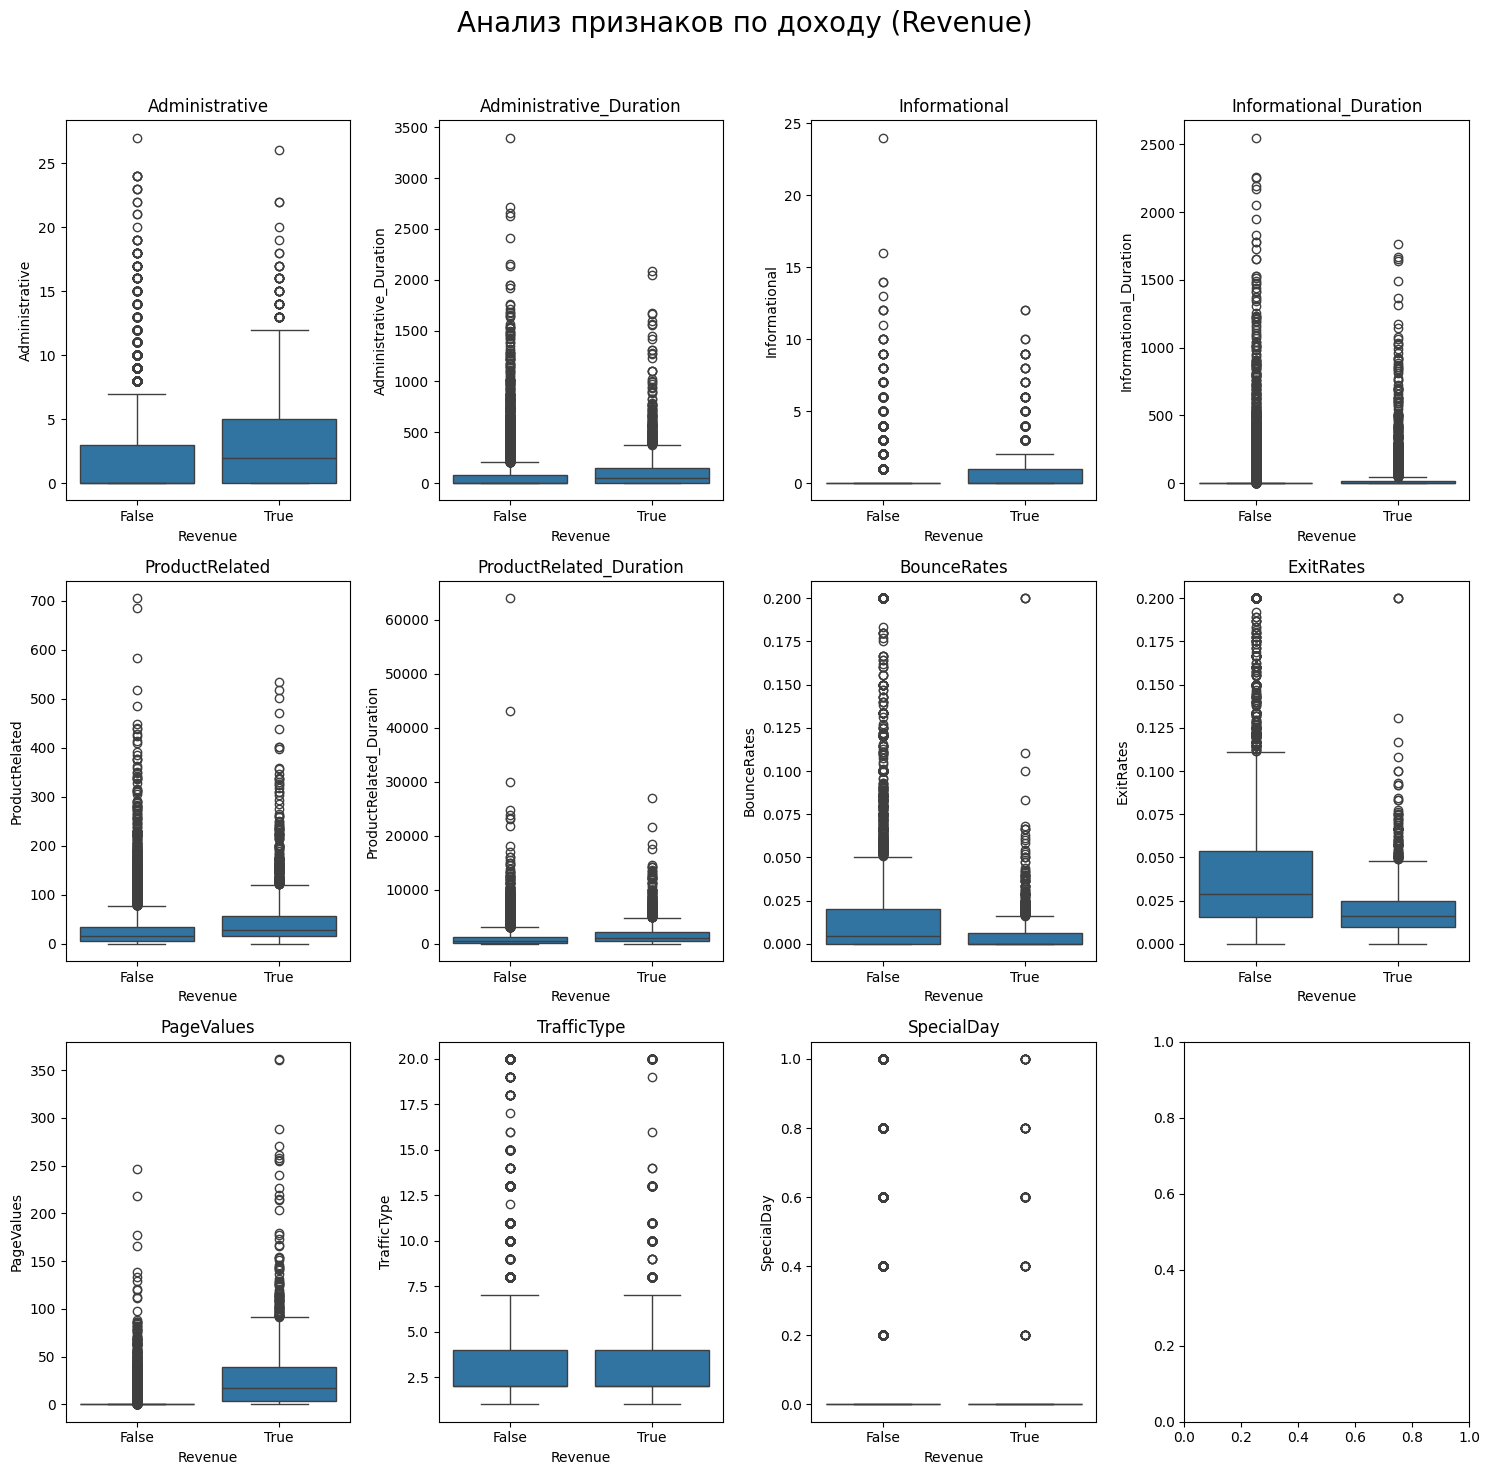

In [26]:
# Анализ числовых признаков
numerical_features = [
    'Administrative',
    'Administrative_Duration',
    'Informational',
    'Informational_Duration',
    'ProductRelated',
    'ProductRelated_Duration',
    'BounceRates',
    'ExitRates',
    'PageValues',
    'TrafficType',
    'SpecialDay'
]

f, axes = plt.subplots(nrows=3, ncols=4, figsize=(15, 15))
f.suptitle('Анализ признаков по доходу (Revenue)', size=20)
for i, feature in enumerate(numerical_features):
    ax = axes[i // 4, i % 4]
    sns.boxplot(x="Revenue", y=feature, data=data, ax=ax)
    ax.set_title(feature)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

**Вывод:** Много выбросов

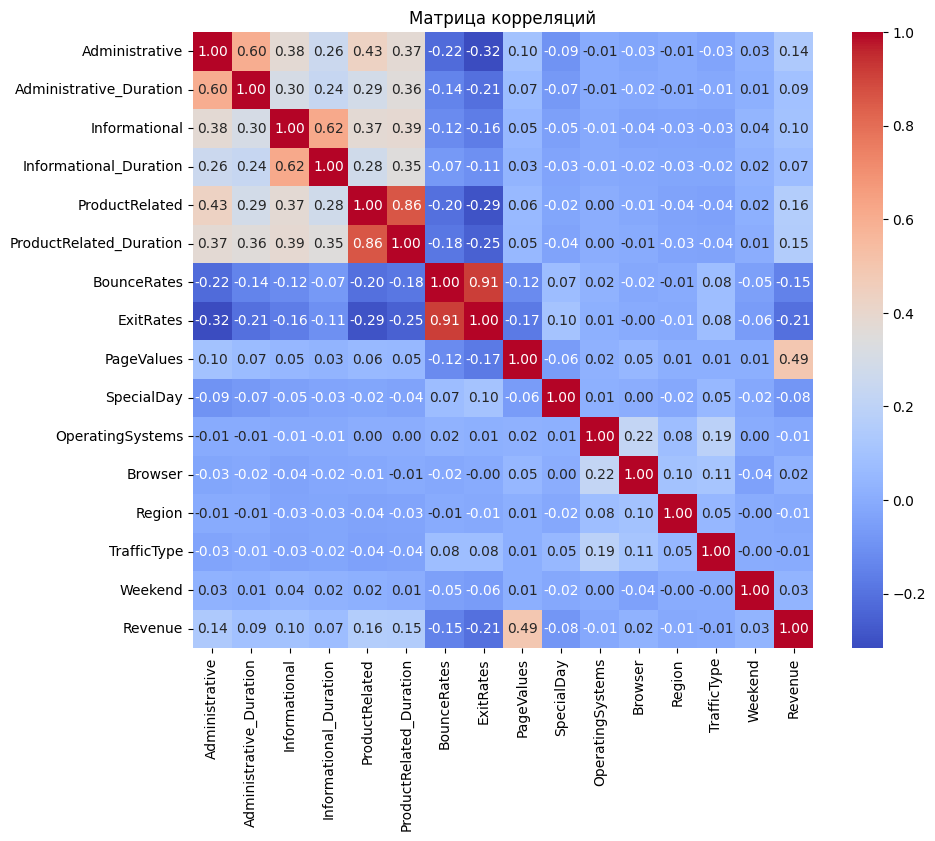

In [27]:
# Корреляционный анализ
plt.figure(figsize=(10, 8))
correlation_matrix = data.corr(numeric_only=True)
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Матрица корреляций')
plt.show()


**Вывод:** Есть признаки, которые коррелируют между собой. Есть признаки, которые слабо коррелируют с целевой переменной.

# **Преобработка данных**

In [28]:
# Удаляем один из коррелирующих признаков
data = data.drop(['Administrative_Duration', 'Informational_Duration', 'ProductRelated_Duration', 'BounceRates'], axis=1)

# Преобразование категориальных признаков
data['Month'] = data['Month'].map({'Feb': 2, 'Mar': 3, 'May': 5, 'June': 6, 'Jul': 7, 'Aug': 8, 'Sep': 9, 'Oct': 10, 'Nov': 11, 'Dec': 12})
data['VisitorType'] = data['VisitorType'].map({'New_Visitor': 0, 'Returning_Visitor': 1, 'Other': 2})
data['Weekend'] = data['Weekend'].astype(int)


In [29]:
print(data.columns)

Index(['Administrative', 'Informational', 'ProductRelated', 'ExitRates',
       'PageValues', 'SpecialDay', 'Month', 'OperatingSystems', 'Browser',
       'Region', 'TrafficType', 'VisitorType', 'Weekend', 'Revenue'],
      dtype='object')


In [30]:
from scipy import stats
import warnings


warnings.filterwarnings("ignore")

#удаление выбросов (преобразования Бокса-Кокса)
list_feature = ['Administrative', 'Informational', 'ProductRelated', 'PageValues', 'SpecialDay', 'TrafficType']

for col in list_feature:
    if data[col].dtype in ['int64', 'float64']:
        data[col] = data[col] + 1
        posdata = data[col][data[col] > 0]
        if len(posdata) > 1:
            try:
                col_data, fitted_lambda = stats.boxcox(posdata)
                data.loc[posdata.index, col] = col_data
            except:
                print(f"Ошибка при преобразовании столбца {col}. Пропуск.")

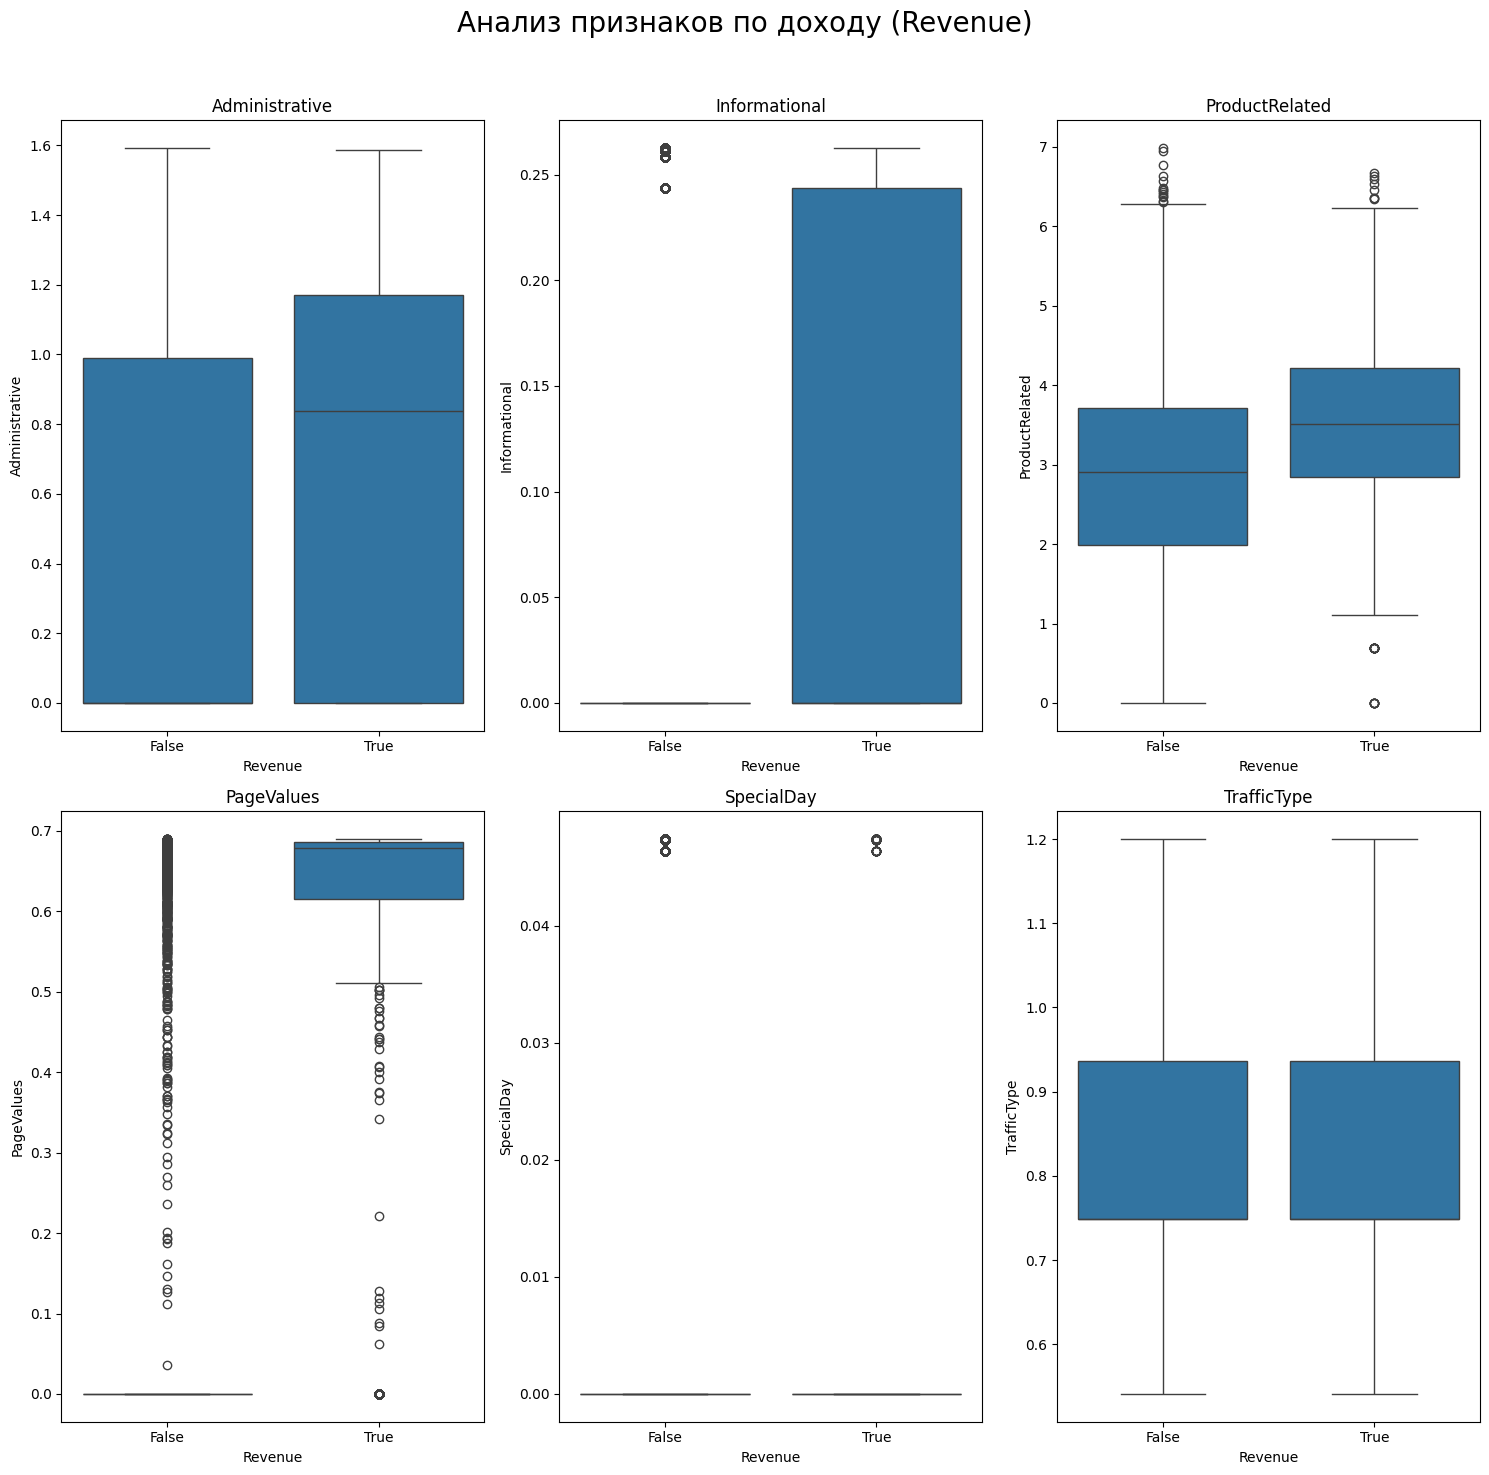

In [31]:
numerical_features = ['Administrative', 'Informational', 'ProductRelated', 'PageValues', 'SpecialDay', 'TrafficType']
f, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 15))
f.suptitle('Анализ признаков по доходу (Revenue)', size=20)

for i, feature in enumerate(numerical_features):
    ax = axes[i // 3, i % 3]
    sns.boxplot(x="Revenue", y=feature, data=data, ax=ax)
    ax.set_title(feature)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

In [32]:
#Проверяем, что все данные числовые переменные
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Administrative    12330 non-null  float64
 1   Informational     12330 non-null  float64
 2   ProductRelated    12330 non-null  float64
 3   ExitRates         12330 non-null  float64
 4   PageValues        12330 non-null  float64
 5   SpecialDay        12330 non-null  float64
 6   Month             12330 non-null  int64  
 7   OperatingSystems  12330 non-null  int64  
 8   Browser           12330 non-null  int64  
 9   Region            12330 non-null  int64  
 10  TrafficType       12330 non-null  float64
 11  VisitorType       12330 non-null  int64  
 12  Weekend           12330 non-null  int64  
 13  Revenue           12330 non-null  bool   
dtypes: bool(1), float64(7), int64(6)
memory usage: 1.2 MB


In [33]:
# Разделение на признаки и целевую переменную
X = data.drop('Revenue', axis=1)
y = data['Revenue']
X.head(5)

,Administrative,Informational,ProductRelated,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend
0,0.0,0.0,0.697694,0.20,0.0,0.0,2,1,1,1,0.540891,1,0
1,0.0,0.0,1.110063,0.10,0.0,0.0,2,2,2,1,0.749165,1,0
2,0.0,0.0,0.697694,0.20,0.0,0.0,2,4,1,9,0.862980,1,0
3,0.0,0.0,1.110063,0.14,0.0,0.0,2,3,2,2,0.935855,1,0
4,0.0,0.0,2.452895,0.05,0.0,0.0,2,3,3,1,0.935855,1,1


In [34]:
#Кодирование категориальных переменных с помощью LabelEncoder
from sklearn.preprocessing import LabelEncoder
X_enc = X.copy()
y_enc = y.copy()
for col in X.columns:
    if X[col].dtypes == 'object' or X[col].dtypes == 'bool':
        lb = LabelEncoder()
        X_enc[col] = lb.fit_transform(X[col].values)
        y_enc = lb.fit_transform(df['Revenue'])


X_enc.head()

,Administrative,Informational,ProductRelated,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend
0,0.0,0.0,0.697694,0.20,0.0,0.0,2,1,1,1,0.540891,1,0
1,0.0,0.0,1.110063,0.10,0.0,0.0,2,2,2,1,0.749165,1,0
2,0.0,0.0,0.697694,0.20,0.0,0.0,2,4,1,9,0.862980,1,0
3,0.0,0.0,1.110063,0.14,0.0,0.0,2,3,2,2,0.935855,1,0
4,0.0,0.0,2.452895,0.05,0.0,0.0,2,3,3,1,0.935855,1,1


In [35]:
from sklearn.model_selection import train_test_split

# Разделение данных с стратификацией
X_train, X_test, y_train, y_test = train_test_split(
    X_enc,
    y_enc,
    test_size=0.2,
    random_state=42,
    stratify=y
)

print("Распределение классов в обучающей выборке:")
print(y_train.value_counts(normalize=True))

print("\nРаспределение классов в тестовой выборке:")
print(y_test.value_counts(normalize=True))

Распределение классов в обучающей выборке:
Revenue
False    0.845296
True     0.154704
Name: proportion, dtype: float64

Распределение классов в тестовой выборке:
Revenue
False    0.845093
True     0.154907
Name: proportion, dtype: float64


In [36]:
from imblearn.over_sampling import SMOTE

# Применение SMOTE для балансировки классов
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

print("Распределение классов после SMOTE:")
print(y_train_resampled.value_counts())

Распределение классов после SMOTE:
Revenue
False    8338
True     8338
Name: count, dtype: int64


In [37]:
from sklearn.preprocessing import StandardScaler

# Стандартизация призаков
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_resampled)
X_test_scaled = scaler.transform(X_test)

# **Создание и обучение модели**

In [42]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

#Логистическая регрессия
logreg_model = LogisticRegression(random_state=42, max_iter=1000)
logreg_model.fit(X_train_scaled, y_train_resampled)

y_pred_logreg = logreg_model.predict(X_test_scaled)

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_logreg))
print()
print("Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred_logreg))


Confusion Matrix:
[[1832  252]
 [  85  297]]

Logistic Regression Classification Report:
              precision    recall  f1-score   support

       False       0.96      0.88      0.92      2084
        True       0.54      0.78      0.64       382

    accuracy                           0.86      2466
   macro avg       0.75      0.83      0.78      2466
weighted avg       0.89      0.86      0.87      2466



In [43]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

model = RandomForestClassifier(random_state=42)
model.fit(X_train_scaled, y_train_resampled)

y_pred = model.predict(X_test_scaled)

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print()
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[1933  151]
 [ 129  253]]


Classification Report:
              precision    recall  f1-score   support

       False       0.94      0.93      0.93      2084
        True       0.63      0.66      0.64       382

    accuracy                           0.89      2466
   macro avg       0.78      0.79      0.79      2466
weighted avg       0.89      0.89      0.89      2466



In [45]:
pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 8.7 MB/s eta 0:00:00


In [46]:
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report

# XGBoost
xgb_model = XGBClassifier(random_state=42, eval_metric='logloss')
xgb_model.fit(X_train_scaled, y_train_resampled)
y_pred_xgb = xgb_model.predict(X_test_scaled)

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print()
print("XGBoost Classification Report:")
print(classification_report(y_test, y_pred_xgb))
print( )

# LightGBM
lgbm_model = LGBMClassifier(random_state=42, verbose=0)
lgbm_model.fit(X_train_scaled, y_train_resampled)
y_pred_lgbm = lgbm_model.predict(X_test_scaled)

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print()
print("LightGBM Classification Report:")
print(classification_report(y_test, y_pred_lgbm))
print( )

# 3. CatBoost
catboost_model = CatBoostClassifier(random_state=42, verbose=0)
catboost_model.fit(X_train_scaled, y_train_resampled)
y_pred_catboost = catboost_model.predict(X_test_scaled)

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print( )
print("CatBoost Classification Report:")
print(classification_report(y_test, y_pred_catboost))
print( )

# SVM
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train_scaled, y_train_resampled)
y_pred_svm = svm_model.predict(X_test_scaled)

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print( )
print("SVM Classification Report:")
print(classification_report(y_test, y_pred_svm))
print( )

Confusion Matrix:
[[1933  151]
 [ 129  253]]

XGBoost Classification Report:
              precision    recall  f1-score   support

       False       0.93      0.93      0.93      2084
        True       0.63      0.62      0.63       382

    accuracy                           0.89      2466
   macro avg       0.78      0.78      0.78      2466
weighted avg       0.89      0.89      0.89      2466


Confusion Matrix:
[[1933  151]
 [ 129  253]]

LightGBM Classification Report:
              precision    recall  f1-score   support

       False       0.94      0.94      0.94      2084
        True       0.66      0.65      0.66       382

    accuracy                           0.89      2466
   macro avg       0.80      0.79      0.80      2466
weighted avg       0.89      0.89      0.89      2466


Confusion Matrix:
[[1933  151]
 [ 129  253]]

CatBoost Classification Report:
              precision    recall  f1-score   support

       False       0.93      0.94      0.94      2084
  

In [ ]:
Вывод:Все модели демонстрируют схожую точность. Однако стоит обратить внимание на то, какая модель лучше использует признаки

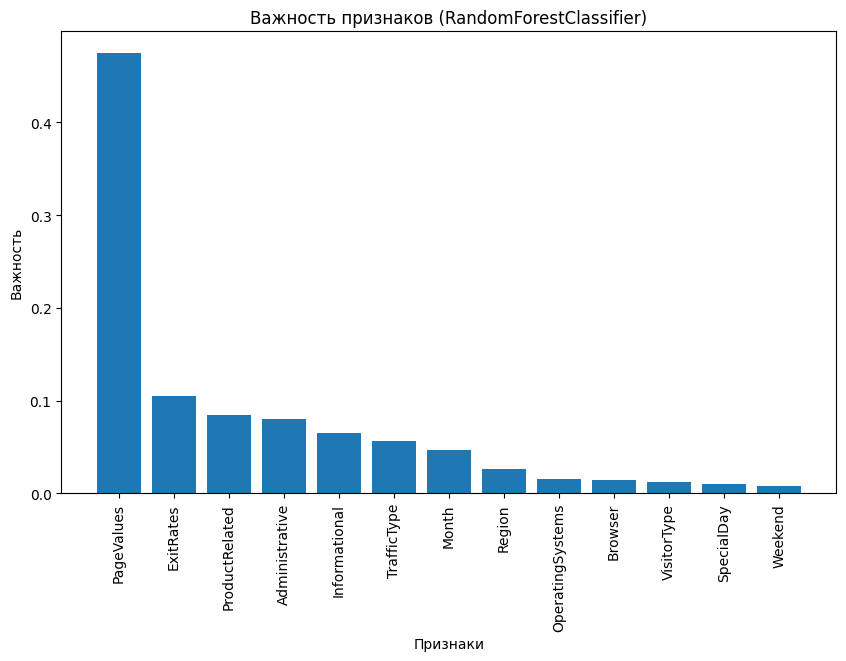

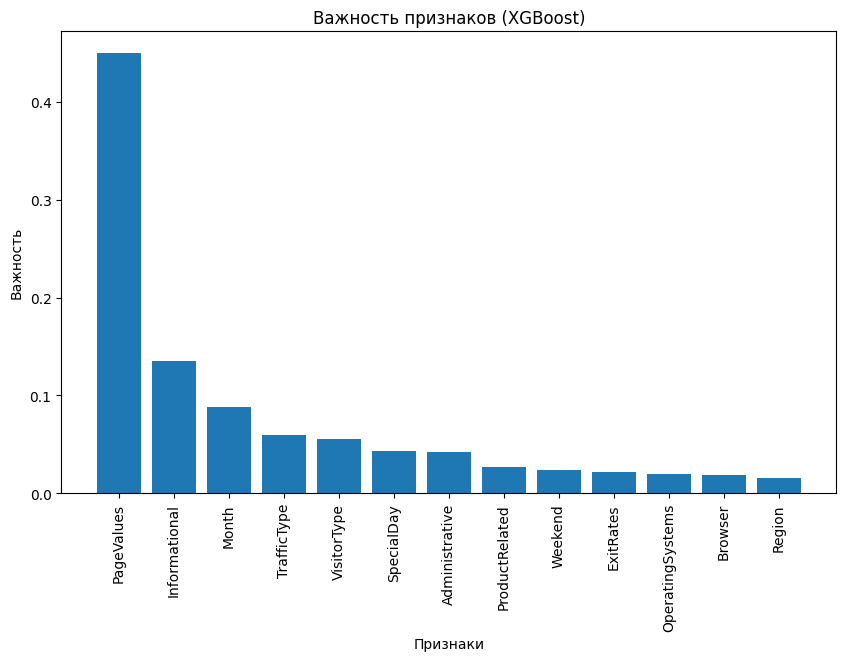

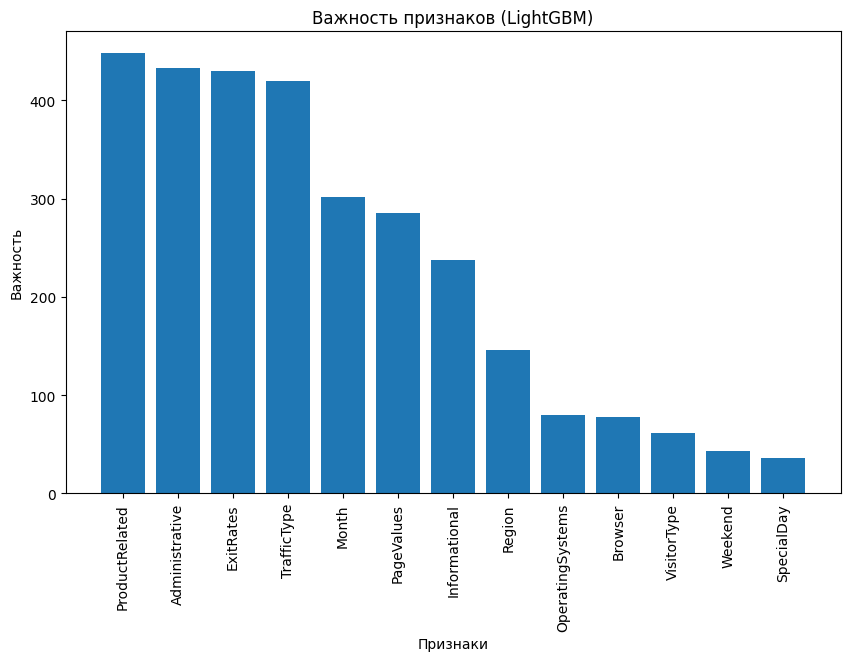

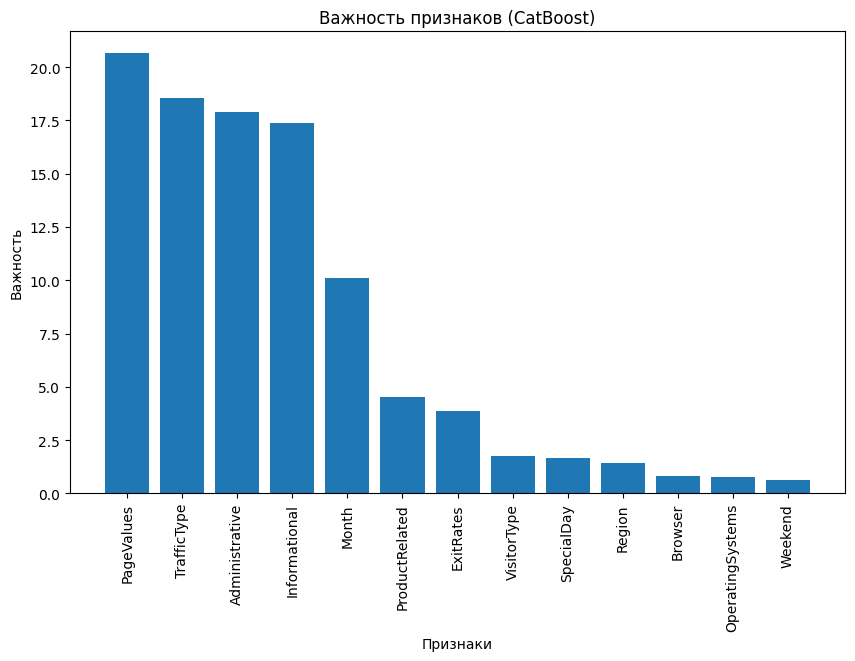

In [49]:
import numpy as np

# Функция для визуализации важности признаков
def plot_feature_importance(model, feature_names, title):
    importance = model.feature_importances_
    indices = np.argsort(importance)[::-1]  # Сортируем по убыванию
    plt.figure(figsize=(10, 6))
    plt.title(title)
    plt.bar(range(len(importance)), importance[indices], align='center')
    plt.xticks(range(len(importance)), [feature_names[i] for i in indices], rotation=90)
    plt.xlabel('Признаки')
    plt.ylabel('Важность')
    plt.show()


feature_names = X_train_resampled.columns

plot_feature_importance(model, feature_names, "Важность признаков (RandomForestClassifier)")

plot_feature_importance(xgb_model, feature_names, "Важность признаков (XGBoost)")

plot_feature_importance(lgbm_model, feature_names, "Важность признаков (LightGBM)")

plot_feature_importance(catboost_model, feature_names, "Важность признаков (CatBoost)")

Вывод: Высокая важность признаков в LightGBM свидетельствует о том, что модель эффективнее использует данные для предсказаний. Попробуем подобрать гиперпараметры

In [50]:
pip install optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 383.6/383.6 kB 18.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.6/233.6 kB 15.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.5/78.5 kB 5.9 MB/s eta 0:00:00


In [51]:
import optuna
from sklearn.metrics import f1_score

# Функция для оптимизации
def objective(trial):
    params = {
        'boosting_type': 'gbdt',
        'objective': 'binary',
        'metric': 'binary_logloss',
        'num_leaves': trial.suggest_int('num_leaves', 20, 100),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3),
        'n_estimators': trial.suggest_int('n_estimators', 100, 500),
        'max_depth': trial.suggest_int('max_depth', 3, 15),
        'min_data_in_leaf': trial.suggest_int('min_data_in_leaf', 10, 100),
        'feature_fraction': trial.suggest_float('feature_fraction', 0.7, 1.0),
        'lambda_l1': trial.suggest_float('lambda_l1', 0, 1),
        'lambda_l2': trial.suggest_float('lambda_l2', 0, 1),
        'random_state': 42,
        'verbose': -1
    }

    model = LGBMClassifier(**params)
    model.fit(X_train_scaled, y_train_resampled)
    y_pred = model.predict(X_test_scaled)
    return f1_score(y_test, y_pred)

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=50)

print("Лучшие параметры:", study.best_params)

[I 2025-03-02 17:08:12,259] A new study created in memory with name: no-name-0bbe4139-4f01-4e4f-a100-851afe903396
[I 2025-03-02 17:08:14,249] Trial 0 finished with value: 0.6477732793522267 and parameters: {'num_leaves': 25, 'learning_rate': 0.07392649165747887, 'n_estimators': 287, 'max_depth': 5, 'min_data_in_leaf': 67, 'feature_fraction': 0.9102227960131389, 'lambda_l1': 0.8106276586474483, 'lambda_l2': 0.1918052905183607}. Best is trial 0 with value: 0.6477732793522267.
[I 2025-03-02 17:08:19,547] Trial 1 finished with value: 0.6311584553928096 and parameters: {'num_leaves': 71, 'learning_rate': 0.05368547172091233, 'n_estimators': 343, 'max_depth': 13, 'min_data_in_leaf': 26, 'feature_fraction': 0.7869447725370623, 'lambda_l1': 0.7161380650343997, 'lambda_l2': 0.780434133536657}. Best is trial 0 with value: 0.6477732793522267.
[I 2025-03-02 17:08:21,694] Trial 2 finished with value: 0.6129032258064516 and parameters: {'num_leaves': 50, 'learning_rate': 0.27239584444162873, 'n_esti

Лучшие параметры: {'num_leaves': 29, 'learning_rate': 0.031282822427415286, 'n_estimators': 371, 'max_depth': 4, 'min_data_in_leaf': 58, 'feature_fraction': 0.8653350413514532, 'lambda_l1': 0.6702181130527922, 'lambda_l2': 0.15944719927510964}


In [53]:
# Лучшие параметры
best_params = {
    'boosting_type': 'gbdt',
    'num_leaves': 29,
    'learning_rate': 0.031282822427415286,
    'n_estimators': 371,
    'max_depth': 4,
    'min_data_in_leaf': 58,
    'feature_fraction':  0.8653350413514532,
    'lambda_l1': 0.6702181130527922,
    'lambda_l2': 0.15944719927510964,
    'random_state': 42,
    'verbose': -1
}

model = LGBMClassifier(**best_params)
model.fit(X_train_scaled, y_train_resampled)
y_pred = model.predict(X_test_scaled)

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[1938  146]
 [ 118  264]]

Classification Report:
              precision    recall  f1-score   support

       False       0.94      0.93      0.94      2084
        True       0.64      0.69      0.67       382

    accuracy                           0.89      2466
   macro avg       0.79      0.81      0.80      2466
weighted avg       0.90      0.89      0.89      2466



**Вывод:** Изменния гиперпараметров существенно не поменяло точность модели. Нужно ещё поработать с данными. Возможно использовать другой метод балансировки классов, создать новые или удалить некторые признаки.